In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Pandas Work

In [2]:
data = pd.read_csv('Value_of_Energy_FY2020.csv')
data.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
Company Name                                 450 non-null object
company contact                              450 non-null object
company email                                433 non-null object
company phone                                450 non-null object
Address                                      450 non-null object
City                                         450 non-null object
State                                        450 non-null object
Postcode                                     450 non-null int64
Industry                                     450 non-null object
Industry descr                               434 non-null object
Company Type                                 450 non-null object
Current fulltime                             446 non-null float64
Job created                                  11 non-null float64
Job retain                                   14 no

In [4]:
data.describe()

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,450.000000,446.000000,11.000000,14.000000,4.500000e+02,4.500000e+02,409.000000,409.000000,409.000000,409.000000,409.000000,4.010000e+02,4.010000e+02
mean,11024.124444,124.186099,13.545455,297.500000,3.943778e+04,4.234601e+05,40.722293,-73.942376,317.982885,27.823961,2049.080685,3.295894e+06,3.163398e+09
std,405.126704,392.750810,16.409532,778.404655,1.345949e+05,1.936066e+06,0.057503,0.065553,93.925749,10.984316,7784.674799,9.897776e+05,9.483943e+08
min,10001.000000,0.000000,2.000000,4.000000,-1.099101e+05,0.000000e+00,40.555080,-74.216206,101.000000,1.000000,1.000000,1.000811e+06,1.000220e+09
25%,11101.000000,11.000000,4.000000,15.500000,1.770948e+03,1.498421e+04,40.676351,-73.984843,301.000000,26.000000,20.000000,3.009889e+06,3.006320e+09
50%,11205.000000,28.000000,10.000000,42.000000,6.101215e+03,5.431184e+04,40.721144,-73.941706,307.000000,30.000000,199.000000,3.336903e+06,3.036760e+09
75%,11232.000000,76.000000,13.500000,160.750000,2.025603e+04,2.003667e+05,40.752096,-73.909345,402.000000,36.000000,543.000000,4.005076e+06,4.003930e+09
max,11693.000000,3878.000000,60.000000,2964.000000,1.568982e+06,3.351826e+07,40.890837,-73.743730,503.000000,51.000000,94201.000000,5.168823e+06,5.070670e+09


In [5]:
num_of_company_names = len(data['Company Name'].str.upper().unique())
print(f'There are {num_of_company_names} companies.')

There are 439 companies.


In [6]:
data.City.value_counts().head(6)
# We can see there are both lower and uppercase values for the same city.

Brooklyn            170
Queens               67
Long Island City     53
Bronx                35
New York             32
BROOKLYN             10
Name: City, dtype: int64

In [7]:
queens = data.loc[data.City.str.upper() == 'QUEENS']
num_of_jobs_created_in_queens = queens['Job created'].sum()
print(f'In Queens there were {num_of_jobs_created_in_queens} jobs created.')

In Queens there were 90.0 jobs created.


In [8]:
data['email_domain'] = [e[-1] if type(e) == list else '' for e in data['company email'].str.split('@')]
data['email_domain']
# we can see there are blanks, so lets just subtract 1.

0        energyspec.com
1                      
2                      
3      industrycity.com
4          silvprop.com
             ...       
445      wontonfood.com
446           gmail.com
447            wwps.com
448    wudfurniture.com
449          wurtec.com
Name: email_domain, Length: 450, dtype: object

In [9]:
number_of_unique_domains = len(data['email_domain'].str.upper().unique())
print(f'There are {number_of_unique_domains-1} unique domains in the dataset.')

There are 361 unique domains in the dataset.


In [10]:
data['NTA_count'] = data.NTA.str.count('-') + 1
data_moreThan5NTA = data.loc[data['NTA_count'] >= 5]
data_moreThan5NTA.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,email_domain,NTA_count


In [11]:
questions = [1,2,3,'4a','4b']
answers = [num_of_company_names, num_of_jobs_created_in_queens, number_of_unique_domains-1, 0, 0]
output = pd.DataFrame(data = {
    'questions' : questions,
    'answers' : answers
})

output.to_csv('Day 4 Answers.csv', index = False)

# Plotting Work

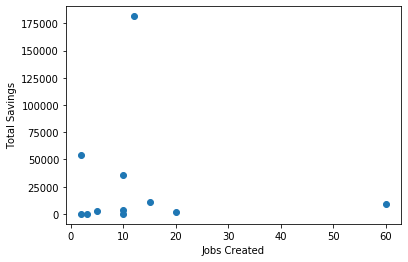

In [12]:
# Jobs created versus average savings
plt.scatter(data['Job created'], data['Total Savings'])
plt.xlabel('Jobs Created')
plt.ylabel('Total Savings')
plt.show()

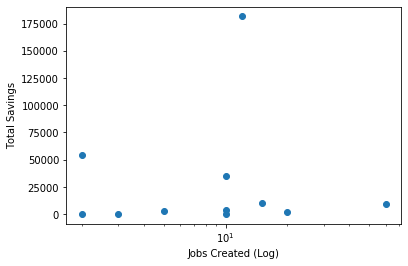

In [13]:
plt.scatter(data['Job created'], data['Total Savings'])
plt.xlabel('Jobs Created (Log)')
plt.ylabel('Total Savings')
plt.xscale('log')
plt.show()

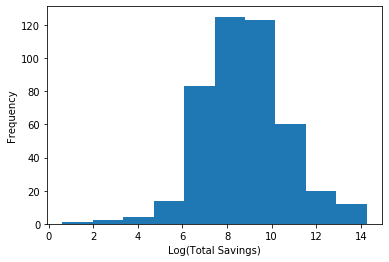

In [14]:
# histogram of the log of the average total savings.
plt.hist(data.loc[data['Total Savings'] > 0]['Total Savings'].apply(math.log))
plt.xlabel('Log(Total Savings)')
plt.ylabel('Frequency')
plt.show()

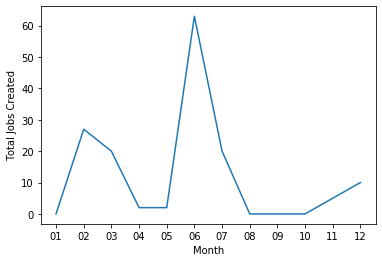

In [15]:
# line plot of the total jobs created for each month.
data['effective_day_month'] = pd.to_datetime(data['Effective Date']).dt.strftime('%m')
month_by_sum_of_job_creation = data.groupby('effective_day_month')['Job created'].agg('sum')
plt.plot(month_by_sum_of_job_creation)
plt.xlabel('Month')
plt.ylabel('Total Jobs Created')
plt.show()